# Ridge or L2 Regularization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_diabetes

data = load_diabetes()

print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [4]:
X = data.data
y = data.target

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45)

In [6]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [7]:
lr.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred = lr.predict(X_test)

In [9]:
from sklearn.metrics import r2_score, mean_squared_error

print(f"R2 score: {r2_score(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")

R2 score: 0.5188118914964637
RMSE: 48.72710829141399


In [10]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha = 0.001)

In [11]:
rr.fit(X_train, y_train)

Ridge(alpha=0.001)

In [12]:
y_pred1 = rr.predict(X_test)

In [13]:
print(f"R2 score: {r2_score(y_test, y_pred1)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred1))}")

R2 score: 0.5201453349902762
RMSE: 48.65954643713929


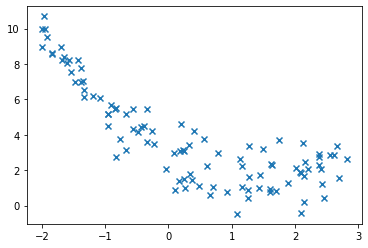

In [14]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2, marker = "x")
plt.show()

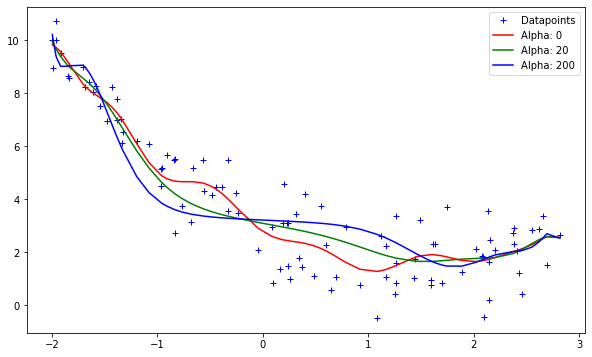

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ("poly_feats", PolynomialFeatures(degree = 16)),
        ("ridge", Ridge(alpha = alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ["r", "g", "b"]

plt.figure(figsize = (10, 6))
plt.plot(x1, x2, 'b+', label = "Datapoints")

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label = f"Alpha: {alpha}")
    
plt.legend()
plt.show()

## For 2D Data

$\text{Cost function, L} = \sum_{i=1}^{n}(y_i - \hat{y_i})^2 + \lambda{m^2} \text{ where } \hat{y_i} = mx_i + b$

and from Linear Regression, we know that $b = \bar{y} - m\bar{x}$ where $\bar{y} = \text{y-mean}$ and $\bar{x} = \text{x-mean}$

$=> L = \sum_{i=1}^{n}[y_i - mx_i - b]^2 + \lambda{m^2}$

$=> L = \sum_{i=1}^{n}[y_i - mx_i - \bar{y} + m\bar{x}]^2 + \lambda{m^2}$

$=> \frac{\delta{L}}{\delta{m}} = 2\sum_{i=1}^{n}[y_i - mx_i - \bar{y} + m\bar{x}][-x_i + \bar{x}] + 2\lambda{m} = 0$

$=> -2\sum_{i=1}^{n}[y_i - mx_i - \bar{y} + m\bar{x}][x_i - \bar{x}] + 2\lambda{m} = 0$

$=> \lambda{m} - \sum_{i=1}^{n}[(y_i - \bar{y}) - m(x_i - \bar{x})](x_i - \bar{x}) = 0$

$=> \lambda{m} - \sum_{i=0}^{n}[(y_i - \bar{y})(x_i - \bar{x}) - m(x_i - \bar{x})^2] = 0$

$=> \lambda{m} - \sum_{i=1}^{n}(y_i - \bar{y})(x_i - \bar{x}) + m\sum_{i=1}{n}(x_i - \bar{x})^2$

$=> \lambda{m} + m\sum_{i=1}{n}(x_i - \bar{x})^2 = \sum_{i=1}^{n}(y_i - \bar{y})(x_i - \bar{x})$

$=> m = \frac{\sum_{i=1}^{n}(y_i - \bar{y})(x_i - \bar{x})}{\sum_{i=0}^{n}(X_i - \bar{x})^2 + \lambda}$

In [ ]:
class RidgeRegression:
    def __init__(self, alpha = 0.1):
        self.alpha = alpha
        self.m = None
        self.b = None
    
    def fit(self, X, y):
        numerator   = 0
        denominator = 0
        
        for i in range(X.shape[0]):
            numerator   += (y[i] - y.mean()) * (X[i] - X.mean())
            denominator += (X[i] - X.mean()) ** 2
        
        self.m = numerator/(denominator + self.alpha)
        self.b = y.mean() - (self.m * X.mean())
        print(self.m, self.b)
            
    def predict(self, X):
        return self.b * X + b

## For nD Data

$L = (XW - Y)^T(XW - Y) + \lambda(w_0^2 + w_1^2 + w_2^2 + ... + w_n^2)$

$=> L = (XW - Y)^T(XW - Y) + \lambda{||W||^2}$

$=> L = (XW - Y)^T[XW - Y] + \lambda{W^TW}$

$=> L = [(XW)^T - Y^T][XW - Y] + \lambda{W^TW}$

$=> L = [W^TX^T - Y^T][XW - Y] + \lambda{W^TW}$

$=> L = W^TX^TXW - W^TX^TY - Y^TXW + Y^TY + \lambda{W^TW}$

$=> L = W^TX^TXW - 2W^TX^TY + Y^TY + \lambda{W^TW}$

$=> \frac{\delta{L}}{\delta{W}} = 2X^TXW - 2X^TY + 0 + 2\lambda{W} = 0$

$=> X^TXW + \lambda{W} = X^TY$

$=> [X^TX + \lambda{I}]W = X^TY$

$=> W = [X^TX + \lambda{I}]^{-1}X^TY$

In [1]:
class DynamicRidgeRegression:
    def __init__(self, alpha = 0.1):
        self.alpha      = alpha
        self.coef_      = None
        self.intercept_ = None
    
    def fit(self, X, y):
        X               = np.insert(X, 0, 1, axis = 1)
        I               = np.identity(X.shape[1])
        # This below line is according to scikit learn
        I[0][0]         = 0
        result          = np.linalg.inv(np.dot(X.T, X) + self.alpha * I).dot(X.T).dot(y)
        self.intercept_ = result[0]
        self.coef_      = result[1:]
    
    def predict(self, X):
        return np.dot(X, self.coeff_) + self.intercept_

## Using Gradient Descent

**Loss function**

$L = [XW - Y]^T[XW - Y] + \lambda{W^TW}$

**and from Gradient Descent, we know**

$W_{new} = W_{old} - \eta{\frac{\delta{L}}{\delta{W}}} \text{ where } \eta = \text{Learning factor}$

$L = \frac{1}{2}[XW - Y]^T[XW - Y] + \frac{1}{2}\lambda{W^TW}$

$L = \frac{1}{2}(W^TX^T - Y^T)(XW - Y) + \frac{1}{2}\lambda{W^TW}$

$L = \frac{1}{2}(W^TX^TXW - Y^TXW - W^TX^TY + Y^TY) + \frac{1}{2}\lambda{W^TW}$

$L = \frac{1}{2}(W^TX^TXW - 2W^TX^TY + Y^TY) + \frac{1}{2}\lambda{W^TW}$

$\frac{\delta{L}}{\delta{W}} = \frac{1}{2}(2X^TXW - 2X^TY) + \frac{1}{2}2\lambda{W}$

$\frac{\delta{L}}{\delta{W}} = X^TXW - X^TY + \lambda{W}$

In [2]:
class DynamicRidgeRegressionUsingGD:
    def __init__(self, alpha = 0.1, epochs = 100, learning_rate = 0.001):
        self.alpha = alpha
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.coef_ = None
        self.intercept = None
    
    def fit(self, X, y):
        self.coef_ = np.ones(X.shape[1])
        self.intercept_ = 0
        thetha = np.insert(self.coef_, 0, self.intercept_)
        
        X = np.insert(X, 0, 1, axis = 1)
        
        for i in range(self.epochs):
            thetha_der = np.dot(X.T, X).dot(thetha) - np.dot(X.T, y) + self.alpha * thetha
            thetha     = thetha - self.learning_rate * thetha_der
        
        self.coef_ = thetha[1:]
        self.intercept_ = thetha[0]
    
    def predict(self, X):
        return np.dot(X, self.coef_) + self.intercept_

### Using Scikit Learn Class

In [ ]:
# If you want to use scikit learn class for SGD
from sklearn.linear_model import SGDRegressor

reg = SGDRegressor(penalty = "l2", max_iter = 500, eta = 0.1, learning_rate = "constant", alpha = 0.001)
reg.fit(X_train, y_train)

# If you want Batch GD
from sklearn.linear_model import Ridge

reg = Ridge(alpha = 0.001, max_iter = 500, solver = "sparse_cg")
reg.fit(X_train, y_train)

# Lasso Regression (L1 Regularization)
## Linear Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

[29.65111868]
-4.123671830704451


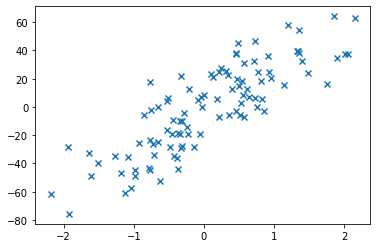

In [2]:
X, y = make_regression(n_samples = 100, n_features = 1, n_informative = 1, n_targets = 1, noise = 20, random_state = 13)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

plt.scatter(X, y, marker = "x")

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)
print(reg.coef_)
print(reg.intercept_)

C:\Users\sayan\AppData\Local\Temp/ipykernel_9808/242097680.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  L.fit(X_train, y_train)
C:\Users\sayan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\sayan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11052.581081469212, tolerance: 8.22396246622431
  model = cd_fast.enet_coordinate_descent(


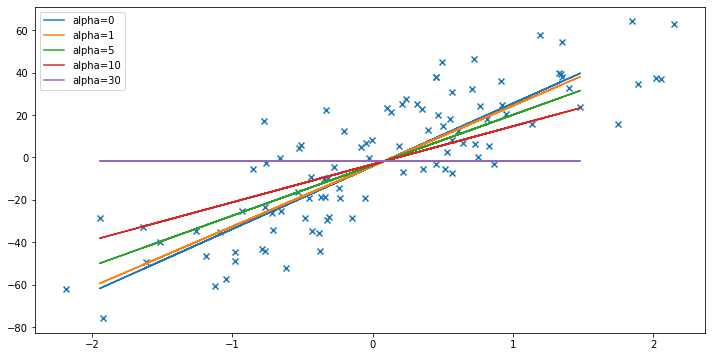

In [3]:
alphas = [0, 1, 5, 10, 30]
plt.figure(figsize = (12, 6))
plt.scatter(X, y, marker = "x")
for i in alphas:
    L = Lasso(alpha = i)
    L.fit(X_train, y_train)
    plt.plot(X_test, L.predict(X_test), label = f"alpha={i}")
plt.legend()
plt.show()

## Non-Linear Data

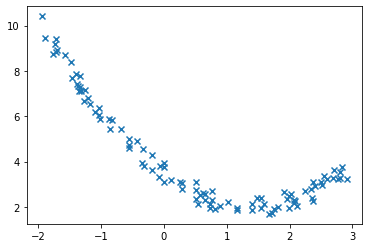

In [4]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.rand(m, 1)

plt.scatter(x1, x2, marker = "x")
plt.show()

C:\Users\sayan\anaconda3\lib\site-packages\sklearn\pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\sayan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\sayan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.453466548489139, tolerance: 0.05320750642114977
  model = cd_fast.enet_coordinate_descent(
C:\Users\sayan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25.9282

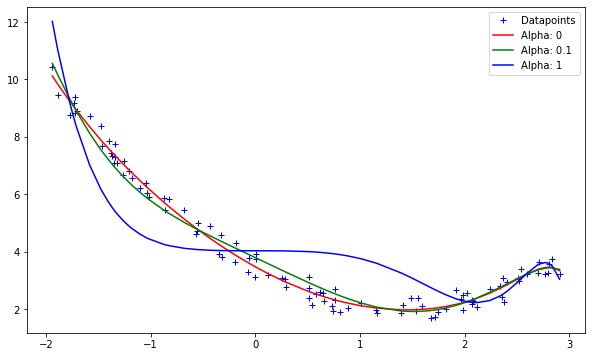

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

def get_pred_lasso(x1, x2, alpha):
    model = Pipeline([
        ("poly_feats", PolynomialFeatures(degree = 16)),
        ("lasso", Lasso(alpha = alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 0.1, 1]
cs = ["r", "g", "b"]

plt.figure(figsize = (10, 6))
plt.plot(x1, x2, "b+", label = "Datapoints")

for alpha, c in zip(alphas, cs):
    preds = get_pred_lasso(x1, x2, alpha)
    # plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label = f"Alpha: {alpha}")
    
plt.legend()
plt.show()

## Keypoints
### How are coefficients affected?

In [1]:
from sklearn.datasets import load_diabetes

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

import warnings

warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None

In [2]:
data = load_diabetes()

df = pd.DataFrame(data.data,columns=data.feature_names)
df['TARGET'] = data.target

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,TARGET
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [3]:
X_train,X_test,y_train,y_test = train_test_split(data.data,data.target,test_size=0.2,random_state=2)

In [4]:
coefs = []
r2_scores = []

for i in [0,0.1,1,10]:
    reg = Lasso(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist())
    y_pred = reg.predict(X_test)
    r2_scores.append(r2_score(y_test,y_pred))

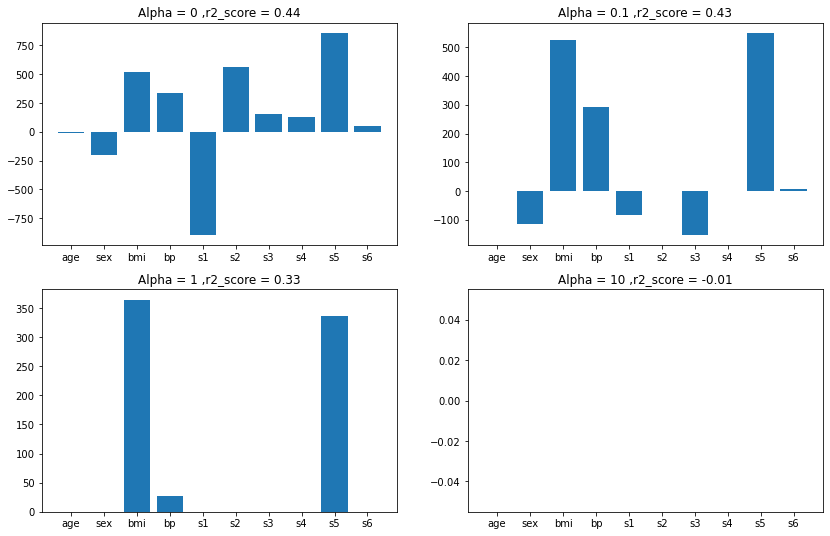

In [5]:
plt.figure(figsize=(14,9))
plt.subplot(221)
plt.bar(data.feature_names,coefs[0])
plt.title('Alpha = 0 ,r2_score = {}'.format(round(r2_scores[0],2)))

plt.subplot(222)
plt.bar(data.feature_names,coefs[1])
plt.title('Alpha = 0.1 ,r2_score = {}'.format(round(r2_scores[1],2)))

plt.subplot(223)
plt.bar(data.feature_names,coefs[2])
plt.title('Alpha = 1 ,r2_score = {}'.format(round(r2_scores[2],2)))

plt.subplot(224)
plt.bar(data.feature_names,coefs[3])
plt.title('Alpha = 10 ,r2_score = {}'.format(round(r2_scores[3],2)))

plt.show()

### Higher Coefficients are affected more

In [6]:
alphas = [0,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

coefs = []

for i in alphas:
    reg = Lasso(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist())

In [7]:
input_array = np.array(coefs)

coef_df = pd.DataFrame(input_array,columns=data.feature_names)
coef_df['alpha'] = alphas
coef_df.set_index('alpha')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
alpha,,,,,,,,,,
0.0000,-9.160885,-205.462260,516.684624,340.627341,-895.543596,561.214523,153.884780,126.734314,861.121395,52.419828
0.0001,-9.071288,-205.337332,516.780313,340.539730,-888.652320,555.952271,150.585260,125.453044,858.639860,52.379002
0.0010,-8.264924,-204.213177,517.641106,339.751339,-826.653342,508.609613,120.899583,113.924518,836.314382,52.011583
0.0100,-1.361404,-192.944226,526.348511,332.649058,-430.205495,191.277876,-44.048113,68.990747,688.384976,47.939528
0.1000,0.000000,-113.976046,526.737112,292.635423,-82.691928,-0.000000,-152.691332,0.000000,551.077200,7.169852
1.0000,0.000000,0.000000,363.882636,27.278420,0.000000,0.000000,-0.000000,0.000000,336.135971,0.000000
10.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
100.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
1000.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


In [8]:
alphas = [0,0.0001,0.0005,0.001,0.005,0.1,0.5,1,5,10]

coefs = []

for i in alphas:
    reg = Lasso(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist())

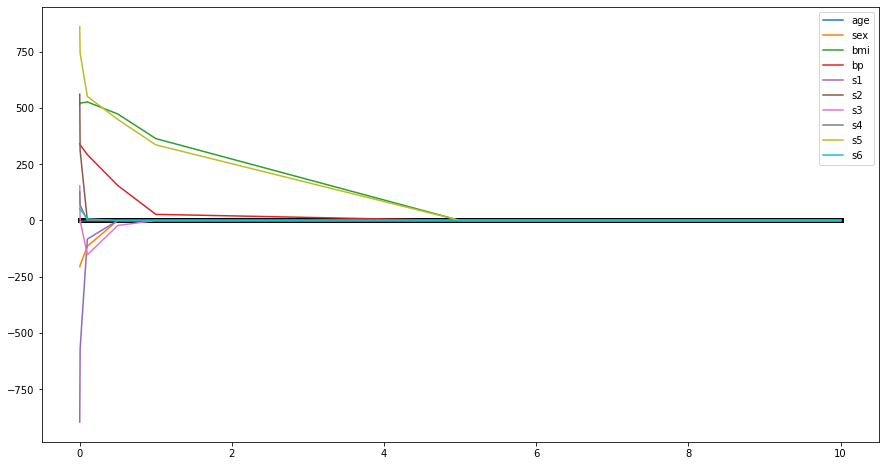

In [10]:
input_array = np.array(coefs).T

plt.figure(figsize=(15,8))
plt.plot(alphas,np.zeros(len(alphas)),color='black',linewidth=5)
for i in range(input_array.shape[0]):
    plt.plot(alphas,input_array[i],label=data.feature_names[i])
plt.legend()
plt.show()

### Impact on Bias & Variance

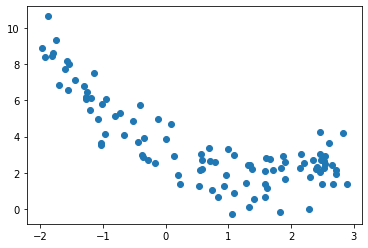

In [11]:
m = 100
X = 5 * np.random.rand(m, 1) - 2
y = 0.7 * X ** 2 - 2 * X + 3 + np.random.randn(m, 1)

plt.scatter(X, y)
plt.show()

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X.reshape(100,1),y.reshape(100),test_size=0.2,random_state=2)

In [13]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=10)

X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

In [15]:
from mlxtend.evaluate import bias_variance_decomp

alphas = np.linspace(0,30,100)

loss = []
bias = []
variance = []

for i in alphas:
    reg = Lasso(alpha=i)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        reg, X_train, y_train, X_test, y_test, 
        loss='mse',
        random_seed=123)
    loss.append(avg_expected_loss)
    bias.append(avg_bias)
    variance.append(avg_var)

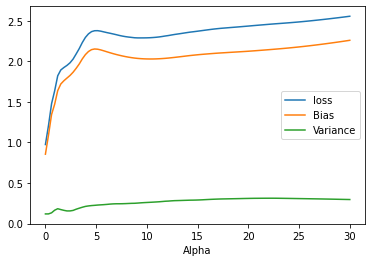

In [16]:
plt.plot(alphas,loss,label='loss')
plt.plot(alphas,bias,label='Bias')
plt.plot(alphas,variance,label='Variance')
plt.xlabel('Alpha')
plt.legend()
plt.show()

### Effect of Regularization on Loss Function

[27.82809103]
-2.29474455867698


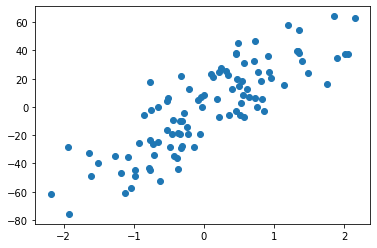

In [17]:
from sklearn.datasets import make_regression

X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

plt.scatter(X,y)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X,y)
print(reg.coef_)
print(reg.intercept_)

In [18]:
def cal_loss(m,alpha):
    return np.sum((y - m*X.ravel() + 2.29)**2) + alpha*abs(m)

In [19]:
def predict(m):
    return m*X - 2.29

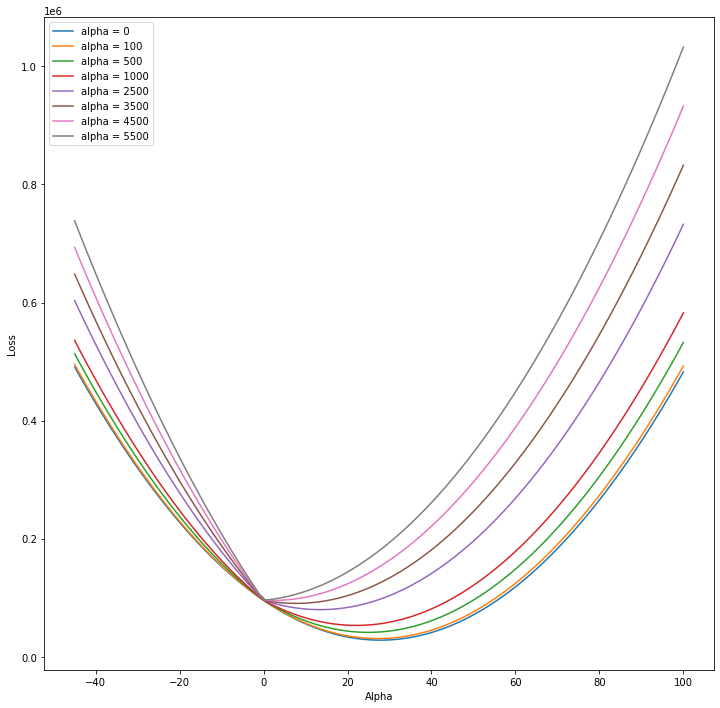

In [20]:
m = np.linspace(-45,100,100)
plt.figure(figsize=(12,12))
for j in [0,100,500,1000,2500,3500,4500,5500]:
    loss = []
    for i in range(m.shape[0]):
        loss_i = cal_loss(m[i],j)
        loss.append(loss_i)
    plt.plot(m,loss,label='alpha = {}'.format(j))
plt.legend()
plt.xlabel('Alpha')
plt.ylabel('Loss')
plt.show()

## ElasticNet Regressor

In [21]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [22]:
X,y = load_diabetes(return_X_y = True)

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [24]:
# Linear Regression
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.4399387660024645

In [25]:
# Ridge 
reg = Ridge(alpha=0.1)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.4519973816947851

In [26]:
# Lasso
reg = Lasso(alpha=0.01)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.4411227990495632

In [27]:
# ElasticNet
reg = ElasticNet(alpha=0.005,l1_ratio=0.9)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.4531493801165679